<a href="https://colab.research.google.com/github/ThanhNhu-20104049/Project/blob/main/Project%20cu%E1%BB%91i%20k%C3%AC_Nh%E1%BA%ADn%20di%E1%BB%87n%20m%C3%B3n%20%C4%83n%20Vi%E1%BB%87t%20Nam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Khai báo các thư viện cần sử dụng
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Kết nối với google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/BTVN/Food/Train', target_size=(224,224), batch_size=32, class_mode='categorical')

Found 1802 images belonging to 10 classes.


In [ ]:
# Tạo bộ dữ liệu test
val_set = val_datagen.flow_from_directory('/content/drive/My Drive/Colab Notebooks/BTVN/Food/Validation', target_size=(224,224), batch_size=32, class_mode='categorical')

Found 68 images belonging to 10 classes.


In [ ]:
# Các nhãn có trong bộ dữ liệu training
training_set.class_indices

{'Bánh bèo': 0,
 'Bánh bông lan': 1,
 'Bánh chưng': 2,
 'Bánh giò': 3,
 'Bánh mì': 4,
 'Bánh pía': 5,
 'Bánh tráng nướng': 6,
 'Bánh xèo': 7,
 'Bún đậu': 8,
 'Nem chua': 9}

In [ ]:
# Các nhãn có trong bộ dữ liệu test
val_set.class_indices

{'Bánh bèo': 0,
 'Bánh bông lan': 1,
 'Bánh chưng': 2,
 'Bánh giò': 3,
 'Bánh mì': 4,
 'Bánh pía': 5,
 'Bánh tráng nướng': 6,
 'Bánh xèo': 7,
 'Bún đậu': 8,
 'Nem chua': 9}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', padding='same',input_shape=(224,224,3))) 
model.add(Conv2D(32,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(256,(3,3), activation='relu', padding='same')) 
model.add(Conv2D(256,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                    

In [ ]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(training_set,epochs=100,batch_size=128,verbose=1, validation_data=val_set,callbacks = [EarlyStopping(monitor='val_loss',patience=30)])

Epoch 1/100
57/57 [==============================] - 31s 541ms/step - loss: 0.0622 - accuracy: 0.9822 - val_loss: 0.3522 - val_accuracy: 0.9118
Epoch 2/100
57/57 [==============================] - 31s 526ms/step - loss: 0.1483 - accuracy: 0.9556 - val_loss: 0.3873 - val_accuracy: 0.8971
Epoch 3/100
57/57 [==============================] - 31s 541ms/step - loss: 0.0449 - accuracy: 0.9861 - val_loss: 0.3284 - val_accuracy: 0.9412
Epoch 4/100
57/57 [==============================] - 31s 541ms/step - loss: 0.0666 - accuracy: 0.9828 - val_loss: 0.4245 - val_accuracy: 0.8824
Epoch 5/100
57/57 [==============================] - 31s 535ms/step - loss: 0.0906 - accuracy: 0.9795 - val_loss: 0.5723 - val_accuracy: 0.8824
Epoch 6/100
57/57 [==============================] - 30s 534ms/step - loss: 0.0350 - accuracy: 0.9889 - val_loss: 0.5154 - val_accuracy: 0.8971
Epoch 7/100
57/57 [==============================] - 34s 590ms/step - loss: 0.0368 - accuracy: 0.9878 - val_loss: 0.4499 - val_accuracy:

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.0151797104626894
Train Accuracy 0.9950055480003357


<function matplotlib.pyplot.show(*args, **kw)>

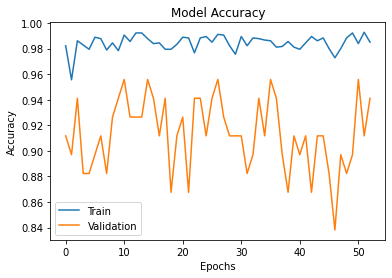

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
# Lưu lại
model.save("Food.h5")

In [ ]:
# Tải mô hình 
model_food=load_model('Food.h5')

1/1 [==============================] - 0s 398ms/step
Bánh giò


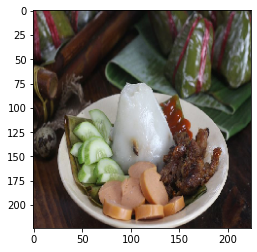

1/1 [==============================] - 0s 19ms/step
Bánh giò


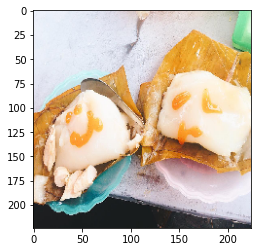

1/1 [==============================] - 0s 18ms/step
Bánh giò


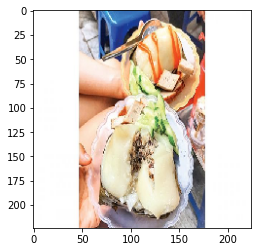

1/1 [==============================] - 0s 22ms/step
Bánh mì


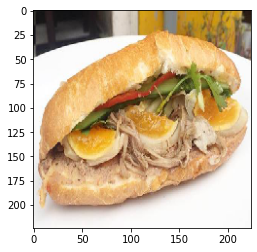

1/1 [==============================] - 0s 18ms/step
Bánh pía


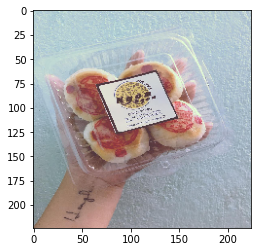

1/1 [==============================] - 0s 16ms/step
Bánh pía


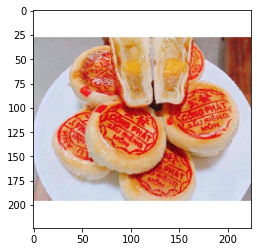

1/1 [==============================] - 0s 18ms/step
Bánh mì


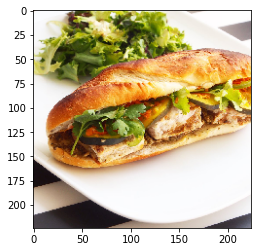

1/1 [==============================] - 0s 16ms/step
Bánh pía


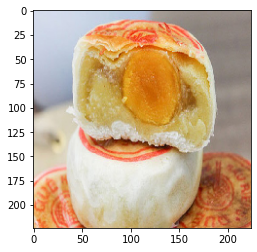

1/1 [==============================] - 0s 16ms/step
Bánh xèo


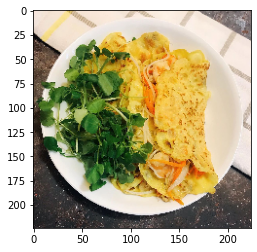

1/1 [==============================] - 0s 19ms/step
Bánh xèo


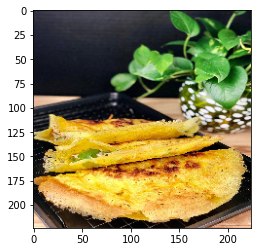

1/1 [==============================] - 0s 17ms/step
Nem chua


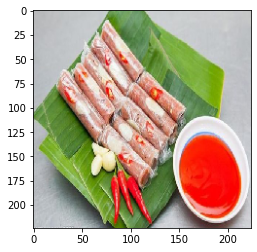

1/1 [==============================] - 0s 17ms/step
Nem chua


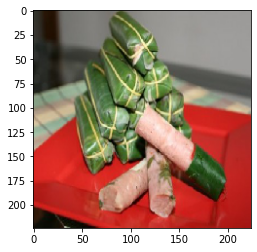

1/1 [==============================] - 0s 22ms/step
Nem chua


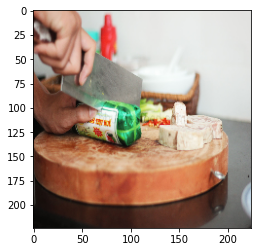

1/1 [==============================] - 0s 18ms/step
Bánh bèo


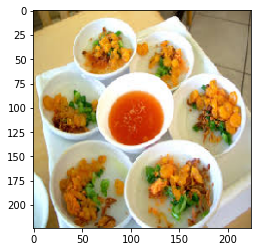

1/1 [==============================] - 0s 27ms/step
Bánh bèo


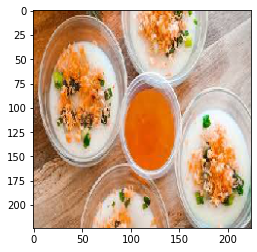

1/1 [==============================] - 0s 18ms/step
Bánh bèo


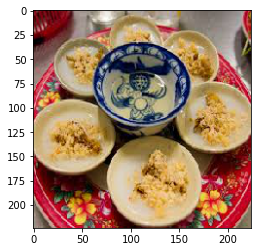

1/1 [==============================] - 0s 16ms/step
Bún đậu


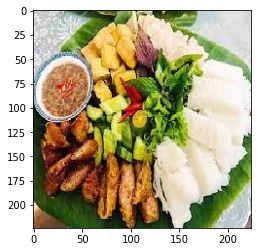

1/1 [==============================] - 0s 23ms/step
Bún đậu


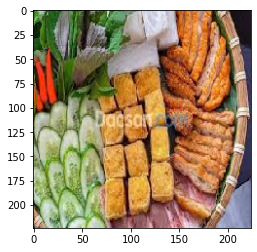

1/1 [==============================] - 0s 16ms/step
Bánh bông lan


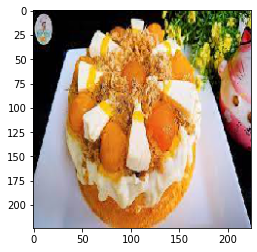

In [ ]:
import os
# Tạo bộ dữ liệu test
test = '/content/drive/My Drive/Colab Notebooks/BTVN/Food/Test'
dict = list(training_set.class_indices.keys())

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(224,224))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_food.predict(img)

  for j in (range(len(result[0]))):
    if round(result[0][j])==1:
      prediction=dict[j]
      print(prediction)
      plt.show()
  